In [69]:
import os
import sys
import glob
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
pd.__version__

'1.0.1'

In [71]:
tophits_summary_csvs = glob.glob("../gather_tophits/*/*summary.csv")
tophits_matches_csv = glob.glob("../gather_tophits/*/*matchinfo.csv")

In [72]:
summaryDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in tophits_summary_csvs])
matchesDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in tophits_matches_csv])

In [73]:
matchesDF

,incorrect lineage,no gather match,filename,lineage_match,num_matches
1331.0,2.0,NaN,gtdb_pep.rep_family.dayhoff_scaled100_k17.gath...,NaN,NaN
1207.0,126.0,NaN,gtdb_pep.rep_family.dayhoff_scaled100_k17.gath...,NaN,NaN
455.0,878.0,NaN,gtdb_pep.rep_family.dayhoff_scaled100_k17.gath...,NaN,NaN
1304.0,29.0,NaN,gtdb_pep.rep_family.dayhoff_scaled100_k17.gath...,NaN,NaN
1331.0,2.0,NaN,gtdb_pep.rep_family.dayhoff_scaled100_k17.gath...,NaN,NaN
...,...,...,...,...,...
phylum,NaN,NaN,gtdb_pep.rep_order.hp_scaled100_k31.gather_top...,correct lineage,505.0
phylum,NaN,NaN,gtdb_pep.rep_order.hp_scaled100_k31.gather_top...,incorrect lineage,137.0
species,NaN,NaN,gtdb_pep.rep_order.hp_scaled100_k31.gather_top...,no gather match,642.0
superkingdom,NaN,NaN,gtdb_pep.rep_order.hp_scaled100_k31.gather_top...,correct lineage,607.0


In [85]:
summaryDF.fillna(0, inplace=True)
# add new columns based on scaled, ksize etc in the filenames
summaryDF["scaled"]= summaryDF["filename"].str.extract(r"scaled(\d*)")
summaryDF["ksize"] = summaryDF["filename"].str.extract(r"k(\d*)")
summaryDF["input_molecule"] = summaryDF["filename"].str.extract(r"gtdb_(\w*)")
summaryDF["alphabet"] = summaryDF["filename"].str.extract(r"\w.(\w*)_scaled")
summaryDF["representative_at"] = summaryDF["filename"].str.extract(r"rep_(\w*).\w*_scaled")
summaryDF["alpha-ksize"] = summaryDF["alphabet"] + "-" + summaryDF["ksize"]

#steps_to_common_ancestor = {"species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom": 6}
#distDF["steps to common ancestor"] = distDF.apply(lambda x: steps_to_common_ancestor[x["rank"]], axis=1)


summaryDF

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,classification_accuracy,alpha-ksize
accession,,,,,,,,,,,,,,,,
GCA_002786495,superkingdom,0.084,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__ABY1...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925,dayhoff-19
GCA_001818895,superkingdom,0.101,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__Pace...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925,dayhoff-19
GCA_002362735,superkingdom,0.072,d__Bacteria;p__Chloroflexota,"['d__Bacteria', 'p__Chloroflexota', 'c__Dehalo...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925,dayhoff-19
GCA_002050025,superkingdom,0.194,d__Bacteria;p__Desulfobacterota,"['d__Bacteria', 'p__Desulfobacterota', 'c__Des...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925,dayhoff-19
GCA_001769925,superkingdom,0.060,d__Bacteria;p__Bdellovibrionota,"['d__Bacteria', 'p__Bdellovibrionota', 'c__Bde...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925,dayhoff-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_003154025,species,0.000,no match,"['d__Bacteria', 'p__Desulfobacterota', 'c__BSN...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000,dayhoff-21
GCA_002422125,species,0.000,no match,"['d__Bacteria', 'p__UBP17', 'c__UBA6191', 'o__...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000,dayhoff-21
GCA_001567305,species,0.000,no match,"['d__Bacteria', 'p__Patescibacteria', 'c__Dojk...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000,dayhoff-21


In [75]:
summaryDF["classification_accuracy"] = summaryDF["total_correct_lineages"] / (summaryDF["total_correct_lineages"] + summaryDF["total incorrect lineages"] + summaryDF["total no match"] )

In [76]:
summaryDF

,rank,percent_match,lineage,true_lineage,lineage_match,total_correct_lineages,total incorrect lineages,total no match,filename,scaled,ksize,input_molecule,alphabet,representative_at,classification_accuracy
accession,,,,,,,,,,,,,,,
GCA_002786495,superkingdom,0.084,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__ABY1...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925
GCA_001818895,superkingdom,0.101,d__Bacteria;p__Patescibacteria,"['d__Bacteria', 'p__Patescibacteria', 'c__Pace...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925
GCA_002362735,superkingdom,0.072,d__Bacteria;p__Chloroflexota,"['d__Bacteria', 'p__Chloroflexota', 'c__Dehalo...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925
GCA_002050025,superkingdom,0.194,d__Bacteria;p__Desulfobacterota,"['d__Bacteria', 'p__Desulfobacterota', 'c__Des...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925
GCA_001769925,superkingdom,0.060,d__Bacteria;p__Bdellovibrionota,"['d__Bacteria', 'p__Bdellovibrionota', 'c__Bde...",correct lineage,1332.0,1.0,0.0,gtdb_pep.rep_family.dayhoff_scaled100_k19.gath...,100,19,pep,dayhoff,family,0.99925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_003154025,species,0.000,no match,"['d__Bacteria', 'p__Desulfobacterota', 'c__BSN...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000
GCA_002422125,species,0.000,no match,"['d__Bacteria', 'p__UBP17', 'c__UBA6191', 'o__...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000
GCA_001567305,species,0.000,no match,"['d__Bacteria', 'p__Patescibacteria', 'c__Dojk...",no gather match,0.0,0.0,642.0,gtdb_pep.rep_order.dayhoff_scaled100_k21.gathe...,100,21,pep,dayhoff,order,0.00000


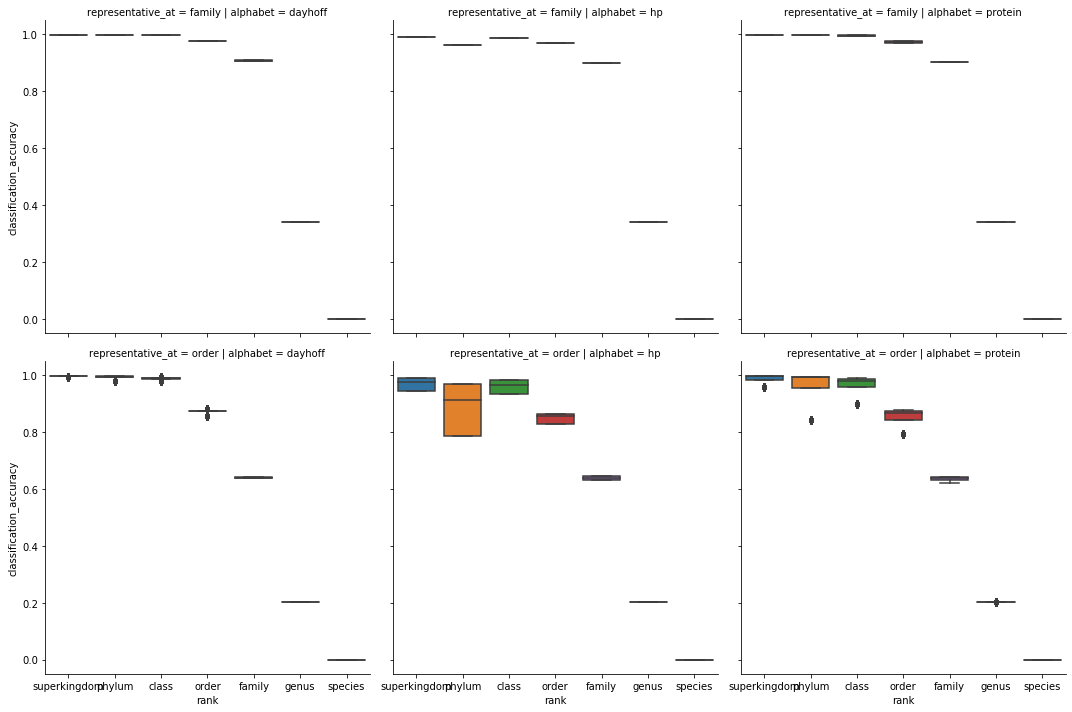

In [77]:
g = sns.catplot(data=summaryDF,x="rank", y="classification_accuracy", kind="box",  col="alphabet", row= "representative_at")
#g.set(yscale="log")

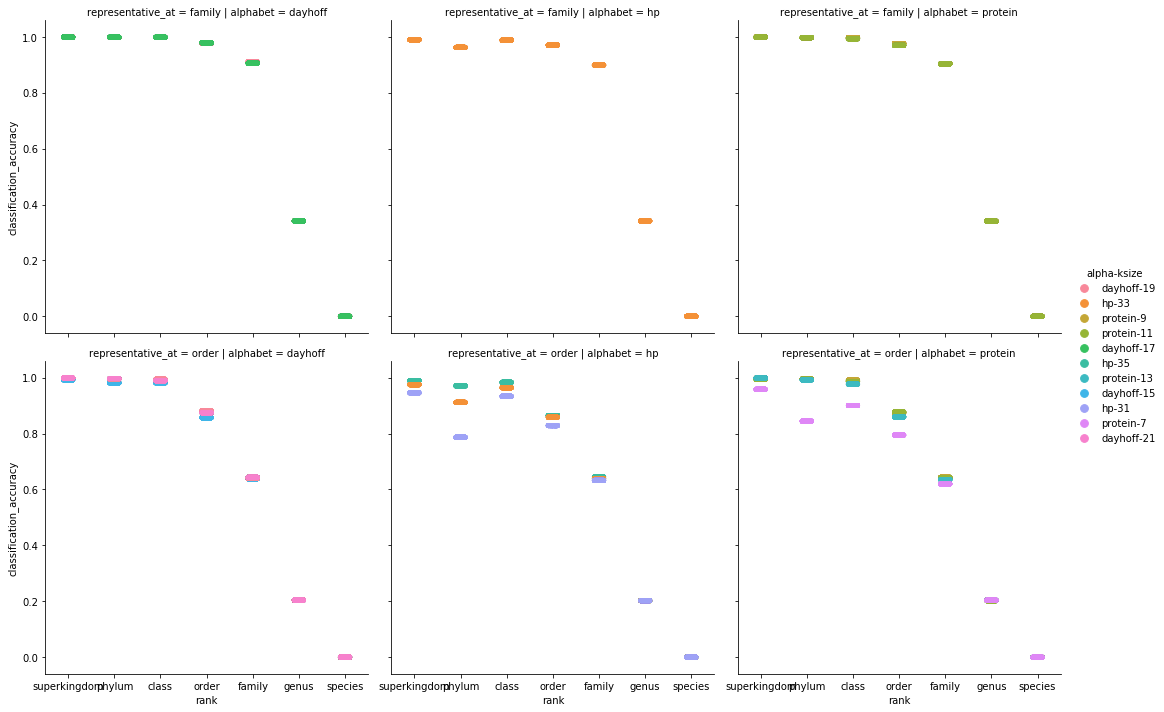

In [87]:
#g = sns.catplot(data=summaryDF,x="rank", y="classification_accuracy", col="alphabet", hue="ksize", row="representative_at")
g = sns.catplot(data=summaryDF,x="rank", y="classification_accuracy",  col="alphabet", hue="alpha-ksize", row="representative_at")


### Select best alphabets, ksizes
than, plot just those on the same graph. Then can have one of these graphs per rep @ order, family, genus 

 - best ksize for protein (of 7,9,11,13) = **11**
 - best ksize for hp (of 31,33,35) = **35**
 - best ksize for dayhoff (of 15,17,19,21) = **19** BUT all are much closer together than the other alpha-ksize combinations. k=21 may be better at family level?



In [79]:
bestK = summaryDF[summaryDF["ksize"].isin(["11","19","35"]) & summaryDF["scaled"].isin(["100"])]


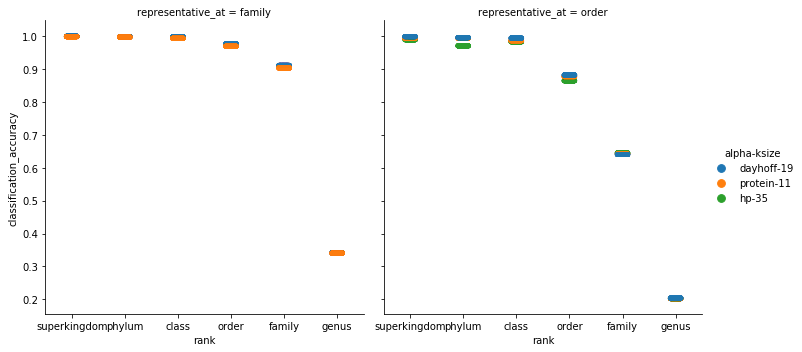

In [83]:
g = sns.catplot(data=bestK[~bestK["rank"].isin(["species"])],x="rank", y="classification_accuracy", hue="alpha-ksize", col="representative_at", alpha=0.3)

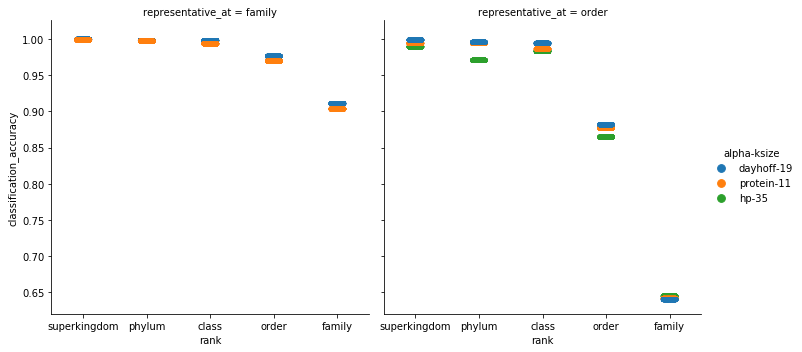

In [81]:
g = sns.catplot(data=bestK[~bestK["rank"].isin(["species","genus"])],x="rank", y="classification_accuracy", hue="alpha-ksize", col="representative_at")
